### Practical Data Science - Session 4

**Learning Objectives**

 - What is Regression ?
 - Assumptions of Linear Regression (OLS) ?
 - Relationship between X and Y variables
 - Fitting the Model
 
 
### What is Regression ?
 
Regression is a Method of establishing a relationship between a Dependent variable (Y) and set of Independent variable(s) using a Statistical estimation.

**Note - Here our focus is the parametric estimation where we try to estimate these using statistical techniques**

Here is a simple equation of linear regression, a straight-line fit to data. A straight-line fit is a model of the form

$$ y = mx + c$$

where m is commonly known as the slope, and c is the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of 5


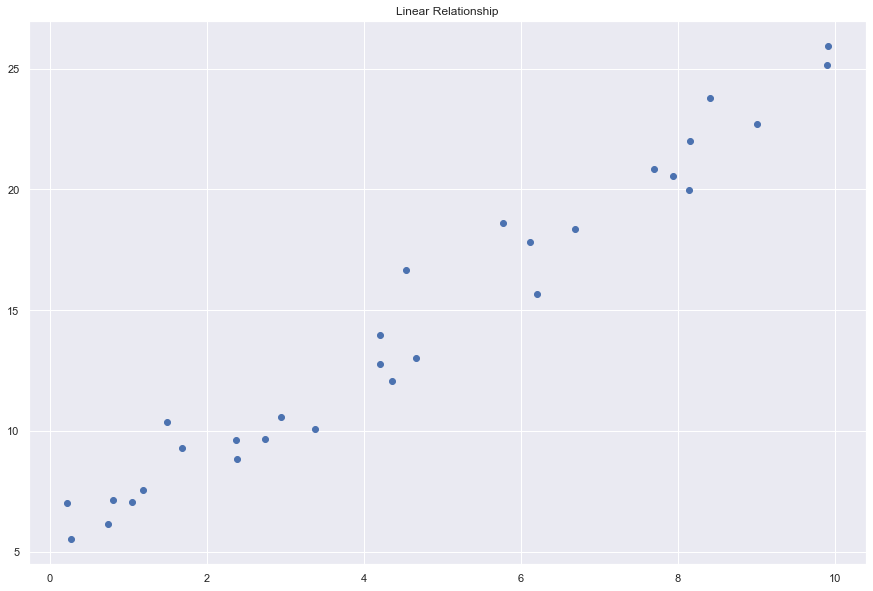

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

rng = np.random.RandomState(111)
x = 10 * rng.rand(30)
y = 2 * x + 5 + rng.randn(30)
plt.figure(figsize = (15, 10))
plt.scatter(x, y)
plt.title("Linear Relationship");

### Assumptions of Linear Regression (OLS)

**1) There should exist a linear Relationship between Dependent and Independent Variable(s)**

Consider the below case where there is non-linear relationship between X and Y variables

Text(0.5, 1.0, 'Non-Linear Relationship')

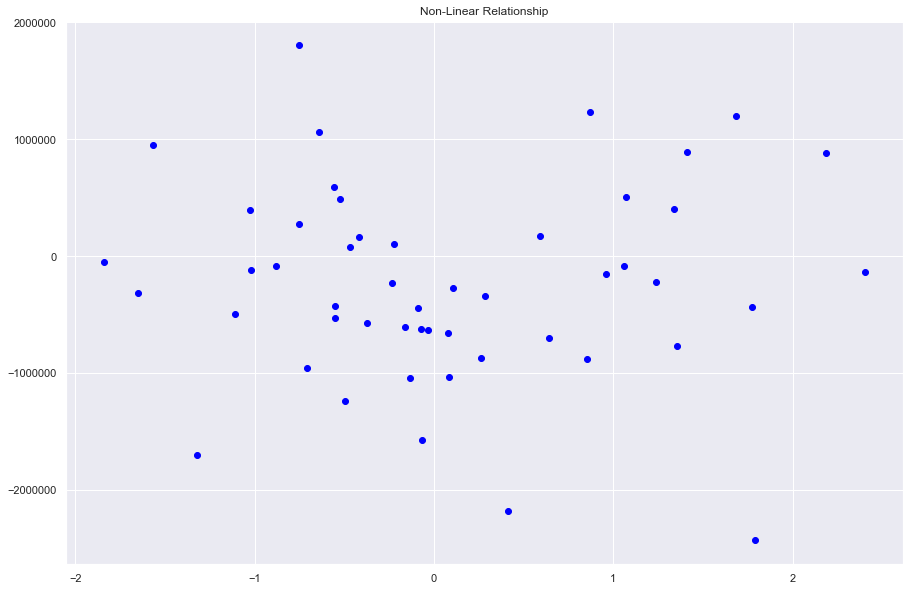

In [27]:
from sklearn.datasets.samples_generator import make_regression
sns.set()
x2, y2 = make_regression(n_samples=50, n_features=1, noise=900000)
plt.figure(figsize = (15, 10))
plt.plot(x2, y2, 'o', color='blue');
plt.title("Non-Linear Relationship")

**2) The variables should be Normally Distributed**

Quantile-Quantile plot and is a technique to compare two probability distributions visually

Using a Q-Q plot, we can check this assumption. 


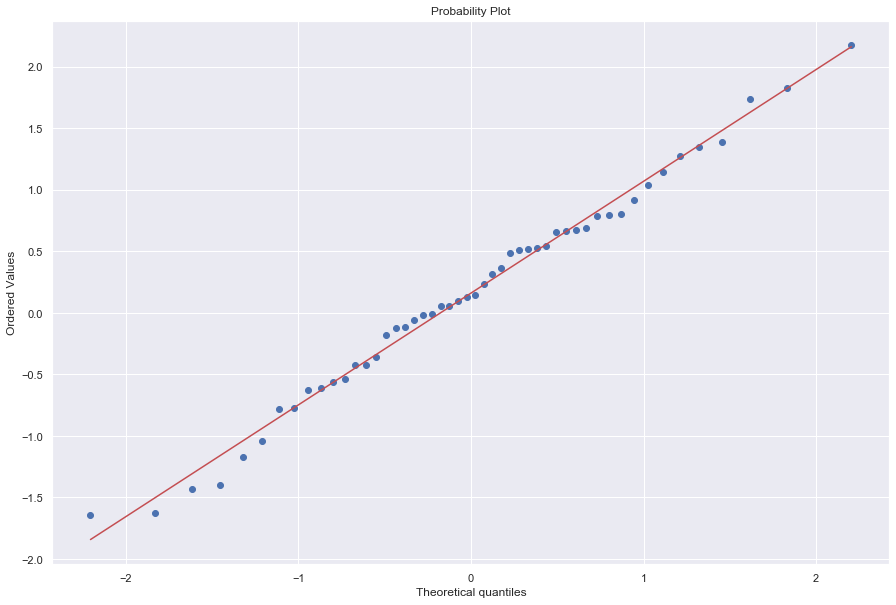

In [28]:
import scipy.stats as stats
sns.set()
x1, y1 = make_regression(n_samples=50, n_features=1, noise=10)
plt.figure(figsize = (15, 10))
stats.probplot(x1[:,0], dist="norm", plot=plt)
plt.show()

**3) Homoscedasticity of Errors**

Homoscedasticity is present when the noise of your model can be described as random and the same throughout all independent variables. If by looking at the scatterplot of the residuals from your linear regression analysis you notice a pattern, this is a clear sign that this assumption is being violated

<img src = https://miro.medium.com/max/1400/1*Ij8bs7kdgkF15x33A1dPUA.png>
<img src = https://miro.medium.com/max/1400/1*oy8od7F8VaXARwHyM3DhOw.png>
     
Image source - https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

**4) No Multi-collinearity between the Independent Variables**

There should not be any correlation between the independent variables. They should be independent

The check for multi-collinearity is using Variance Inflation factor (VIF). The formula to compute VIF is as follows. For practical purposes the VIF values should be less than 5

$$VIF = \frac{1}{1-R^2}$$

### Relationship between X and Y

**Coefficient of Determination** or **R-Squared** explains to what extent the variance of one variable explains the variance of the second variable. This metric measures the percentage of variance in the Dependent variable (**Y**) explained by Independent variables (**X**)

$${R^2} = 1 - \frac{\text{Unexplained Variance}}{\text{Total Variance}}$$

This should not be condused with **r** which is the correlation coefficient, which tells us the strength of correlation between two variables

Does correlation imply causation? **NOT ALWAYS!**

**Let's talk about a funny example to explain this phenomenon briefly**

“This is the second time I have written you, and I don’t blame you for not answering me, because I kind of sounded crazy, but it is a fact that we have a tradition in our family of ice cream for dessert after dinner each night. But the kind of ice cream varies so every night, after we’ve eaten, the whole family votes on which kind of ice cream we should have and I drive down to the store to get it.

It’s also a fact that I recently purchased one of your new automobiles and since then my trips to the store have created a problem. You see, every time I buy vanilla ice cream, when I start back from the store my car won’t start. If I get any other kind of ice cream, the car starts just fine. I want you to know I’m serious about this question, no matter how silly it sounds: ‘What is there about this car that makes it not start when I get vanilla ice cream, and easy to start whenever I get any other kind?”

### Fitting the Model

Curve fitting is the process of identifying the model that provides the best fit to the distribution in your dataset. In case of linear relationships, we can estimate the change in **Y** for a unit change in **X**, this is always true. But there would be cases where it is not as simple

**Why do we use curve fitting?**

Once we fit the model we should also ensure it is capturing all kinds of relationships. When a model fails to capture the relationships, the predictors may not be carrying sufficient information to explain the relationship

Let's look at an example to understand this


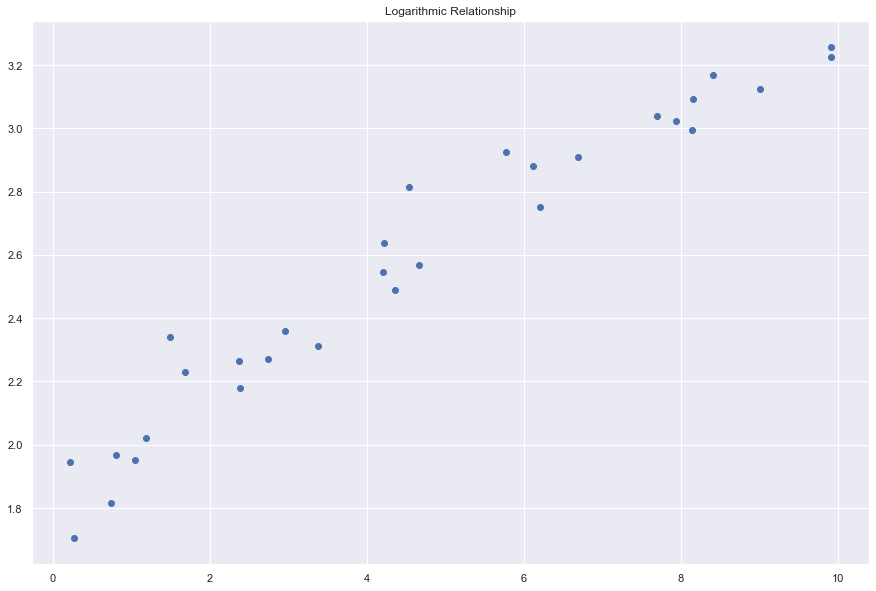

In [46]:
sns.set()
from math import log, exp

%matplotlib inline

rng = np.random.RandomState(111)
x = 10 * rng.rand(30)
y = np.log(2*x + 5 + rng.randn(30))
plt.figure(figsize = (15, 10))
plt.scatter(x, y)

plt.title("Logarithmic Relationship");